Objective:

The Objective of this project is to accurately predict the suitable drug outcomes form patients.

Data Description
1. Age : Age of the patient
2. Sex : Gender of the patients
3. BP : Blood Pressure Levels
4. Cholestrol : Cholesterol Levels
5. Na_to_K : Sodium to Potassium Ration in Blood
6. Drug : Drug Type

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\mahab\Desktop\Machine Learning\Datasets\drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Lets Start EDA

In [3]:
df.shape

(200, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Checking the Null Values

In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.value_counts("Drug")

Drug
DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: count, dtype: int64

In [20]:
df["Cholesterol"].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [11]:
df.duplicated().sum()

0

Checking outlier for age

{'whiskers': [<matplotlib.lines.Line2D at 0x1d5068e55b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5068e5bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d5068e52e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5068e6180>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d5068e6480>],
 'means': []}

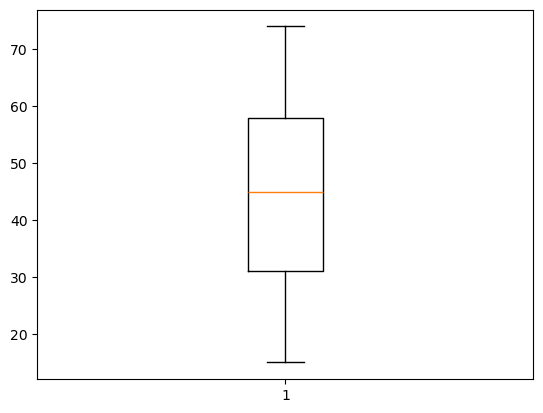

In [12]:
plt.boxplot(df["Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d5070ff380>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5070ff9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d5070ff080>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5070ffe30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d507140110>],
 'means': []}

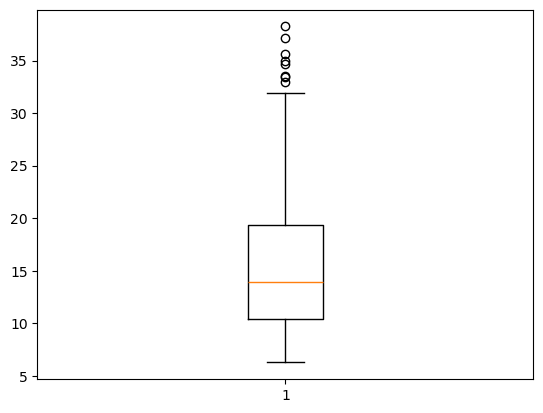

In [13]:
plt.boxplot(df["Na_to_K"])

Visual Analysis

Text(0.5, 1.0, 'Cholesterol level with Sex')

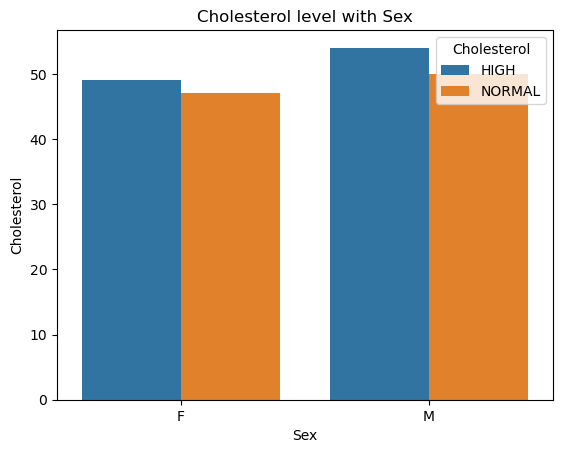

In [21]:
se = df.groupby("Sex")["Cholesterol"]
sns.countplot(x ="Sex", data = df, hue = "Cholesterol")
plt.ylabel("Cholesterol")
plt.title("Cholesterol level with Sex")

With the above graph we can se that Men are having High Cholesterol level when compared to women.

<Axes: xlabel='Age', ylabel='Na_to_K'>

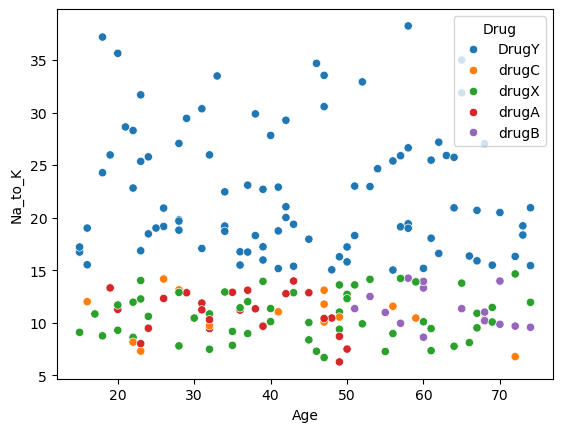

In [ ]:
sns.scatterplot(x= "Age", y="Na_to_K", data = df, hue = "Drug")

Text(0.5, 1.0, 'BP regards to Gender')

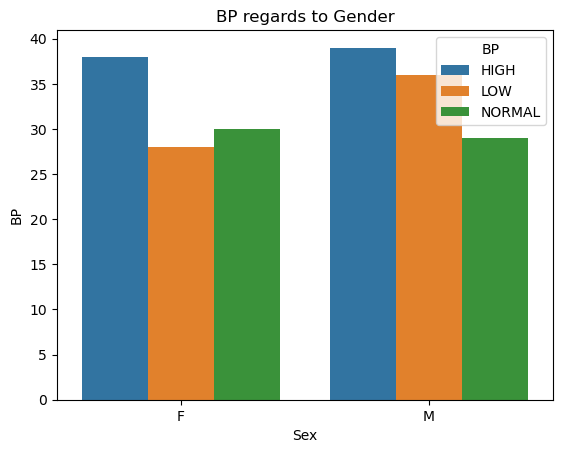

In [30]:
ag = df.groupby("Sex")["BP"]
sns.countplot(x = "Sex", data = df, hue = "BP")
plt.ylabel("BP")
plt.title("BP regards to Gender")

With the above graph we can see Males are having High BP than Females

C:\Users\mahab\AppData\Local\Temp\ipykernel_14608\2025000307.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

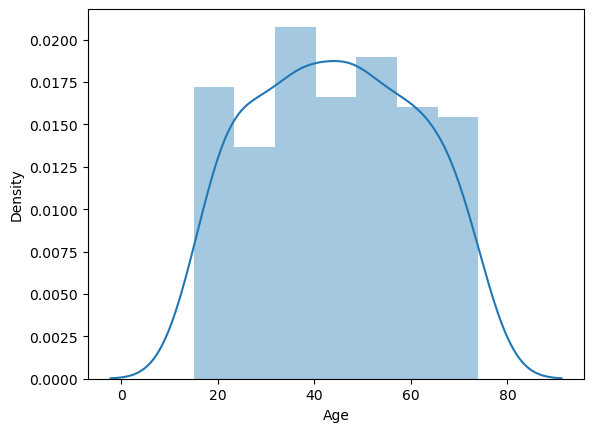

In [33]:
# Age distribution
sns.distplot(df["Age"])

Label Enoding

In [35]:
from sklearn.preprocessing import LabelEncoder

In [38]:
# Lets use for loop
# we are going to encode 4 columsn which are age, sex, cholesterol and drugs
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col]=le.fit_transform(df[col])
        print(le.classes_)

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
['DrugY' 'drugA' 'drugB' 'drugC' 'drugX']


In [58]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


Seperating the data

In [8]:
x = df.drop("Drug", axis = 1)
y = df["Drug"]

In [9]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [10]:
y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

Selecting the model

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [44]:
print(X_train.shape)
print(X_test.shape)
print("*"*10)
print(y_train.shape)
print(y_test.shape)

(140, 5)
(60, 5)
**********
(140,)
(60,)


Model Building

In [45]:
# SVC = Support Vector Classifier
# SVR = Support Vector Regressor
from sklearn.svm import SVC
svm_model = SVC()

Fitting the model with .fit() function

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = X_train.select_dtypes(include=['object']).columns

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)


In [52]:
svm_model.fit(X_train_encoded, y_train)


SVC()

Testing of machine/predicting 

In [54]:
y_pred=svm_model.predict(X_test_encoded)

Checking the Accuracy

In [55]:
from sklearn.metrics import *

In [ ]:
accuracy_score(y_test,y_pred)

0.7166666666666667

Trian score

In [64]:
svm_model.score(X_train_encoded,y_train)

0.6785714285714286

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       DrugY       0.90      1.00      0.95        27
       drugA       0.00      0.00      0.00         4
       drugB       0.00      0.00      0.00         6
       drugC       0.00      0.00      0.00         4
       drugX       0.53      0.84      0.65        19

    accuracy                           0.72        60
   macro avg       0.29      0.37      0.32        60
weighted avg       0.57      0.72      0.63        60



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
